<h1 align='center' style='color:purple'><b>Red Wine Quality</b></h1>

Red wine is a type of wine made from dark-colored grape varieties. The actual color of the wine can range from intense violet, typical of young wines, through to brick red for mature wines and brown for older red wines.

**Goal of the case study**  
The problem statement is that we need to predict the quality of wine with respect to different parameters such as alcohol, acidity, density, pH, etc using an Artificial Neural Network (ANN).

# Outline
1. Import Datasets
2. Missing Value's Imputation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Model Building
6. Model Evaluation

In [ ]:
# Import Pandas and NumPy
import numpy as np 
import pandas as pd

# Import Libraries for plotting
import matplotlib.pyplot as plt, seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Change pandas settings to Display all columns
pd.set_option('display.max_columns',None)

We will be using [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) data visualization libraries.  
Seaborn is a library  library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### 1. Import Datasets

In [ ]:
# wine_df = pd.read_csv('winequality-red.csv')
from google.colab import files
uploaded = files.upload()

import io
wine_df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

 
X = wine_df.iloc[:, 3:-1].values
y = wine_df.iloc[:, -1].values

Saving winequality-red.csv to winequality-red.csv


### Lets have a look at each datasets

In [ ]:
print('Shape of general_data :',wine_df.shape)
wine_df.head()

Shape of general_data : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This Dataset contains 11 different features which affect the quality of red wine.

#### Lets have a look at the Input variables (based on physicochemical tests):  

- fixed acidity : non-volatile acids that do not evaporate readily

- volatile acidity : are high acetic acid in wine which leads to an unpleasant vinegar taste

- citric acid : acts as a preservative, adds freshness and flavor to wines

- residual sugar : amount of sugar remaining after fermentation stops

- chlorides : the amount of salt in the wine

- free sulfur dioxide : prevents microbial growth

- total sulfur dioxide : amount of free + bound forms of SO2

- density : density of wine (affects sweetness)

- pH :  is a scale used to specify the acidity or basicity of wine

- sulphates : sulphate content

- alcohol : alcohol content

- quality - quality (score between 0 and 10, Output variable (based on sensory data))

#### Let's check column data types

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- All input features are numerical, so we dont need to encode anything.

#### Let's Check the distribution of numerical columns

In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- There are outliers present in a few features like 'residual sugar', 'total sulfur dioxide' as their max value is much higher compared to the 75th percentile value.

## 2. Missing Value's Imputation

#### Check for missing Values

In [ ]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Missng values present.

## 3. Exploratory Data Analysis

#### Let's check the distribution of each Input Features using [Histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)  
histplot is used to Plot univariate or bivariate histograms to show distributions of a variable.A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

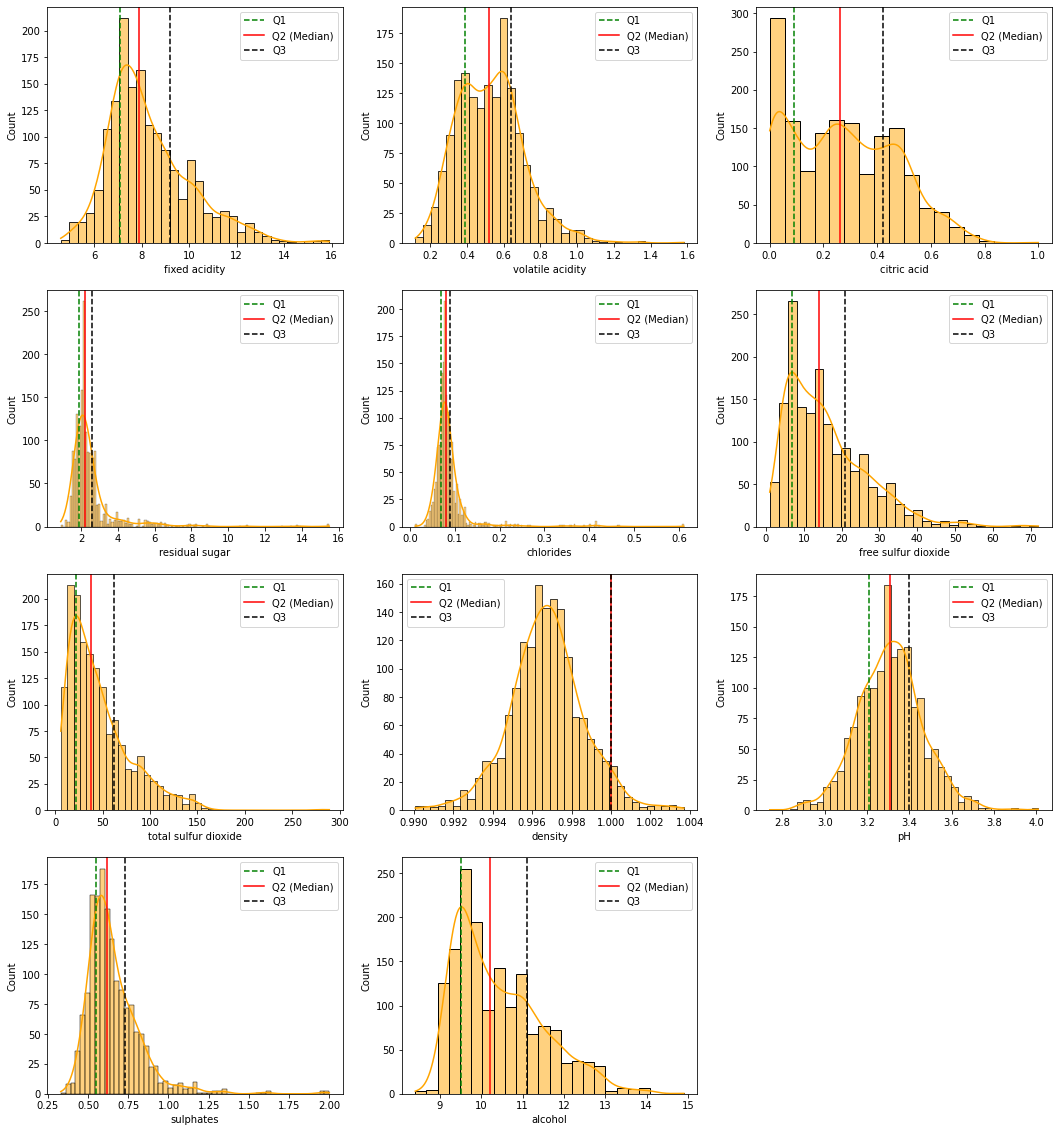

In [ ]:
feature_ = wine_df.columns[:-1] # Skip the target variable 'quality'. Later, we weill plot it separately

def get_percentile(feature, q_range):
    """This function is used to calculate the percentile for the passed input feature present
    in wine_df dataframe. After calculation, the value is rounded upto the second decimal place and returned.
    Args:
        feature: the feature(present in wine_df dataframe) for which the quantile needs to be calculated.
        q_range: used to define which percentile value (example - 50 for calculating 50th percentile(median))
    returns:
    dist: the quantile value
    """
    dist = wine_df[feature].describe()[str(q_range) + '%']
    return round(dist,2)

def render_counterplot():
    fig=plt.figure(figsize=(18, 20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4, 3, column + 1)
        
        q1 = get_percentile(feature, 25)
        q2 = get_percentile(feature, 50)
        q3 = get_percentile(feature, 75)
          
        sns.histplot(data=wine_df, x=feature, kde=True, color = 'orange')
        
        plt.axvline(q1, linestyle='--', color='green', label='Q1')
        plt.axvline(q2, color='red', label='Q2 (Median)')
        plt.axvline(q3, linestyle='--',  color='black', label='Q3')
        plt.legend()
        
    plt.show()
    
render_counterplot()

- In univariate analysis, it was observed that a input features like 'chlorides', 'residual sugar', 'total sulphur dioxide', 'sulphates' are skewed due to the presence of outliers.

**[Skewness](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)**  
Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode. The mode marks the response value on the x-axis that occurs with the highest probability. A distribution is skewed if the tail on one side of the mode is fatter or longer than on the other: it is asymmetrical.  
In an asymmetrical distribution : 
- a **negative skew** indicates that the tail on the left side is longer than on the right side (left-skewed)  
- a **positive skew** indicates the tail on the right side is longer than on the left (right-skewed).  
  
  
Asymmetric distributions occur when **extreme values(or Outliers**) lead to a distortion of the normal distribution.

![434px-Relationship_between_mean_and_median_under_different_skewness.png](attachment:434px-Relationship_between_mean_and_median_under_different_skewness.png)

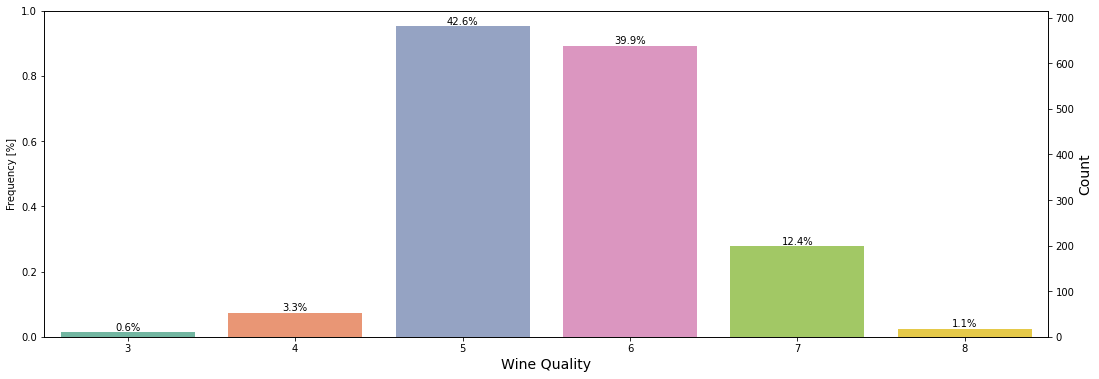

In [ ]:
# Initialize a figure for plotting the Distribution of target class 'quality'
plt.figure(figsize = (18,6))
    
# Generate a countplot for the passed feature_name
ax1 = sns.countplot(x='quality', data=wine_df, palette='Set2')        
# set title, xlabel, ylabel, legend
plt.xlabel('Wine Quality',fontsize  = 14)
plt.ylabel('Count',fontsize  = 14)

# Make twin axis
ax2=ax1.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax1.yaxis.tick_right()

# Also switch the labels over
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(wine_df)), (x.mean(), y), ha='center', va='bottom')

- There is a huge [Class imbalance](https://machinelearningmastery.com/what-is-imbalanced-classification/#:~:text=Imbalanced%20classification%20refers%20to%20a,is%20instead%20biased%20or%20skewed.) in the target variable 'quality'.  
- Out of 6 Categories, category 5 and 6 together have around 82.5% of the records.

#### Lets check the distribution of Input Features with respect to target variable using a [Box-plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)  
In descriptive statistics, a box-plot or boxplot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (first, second (median), third ), Maximum and Minimum values as shown in the image below.

![boxplot1.png](attachment:boxplot1.png)

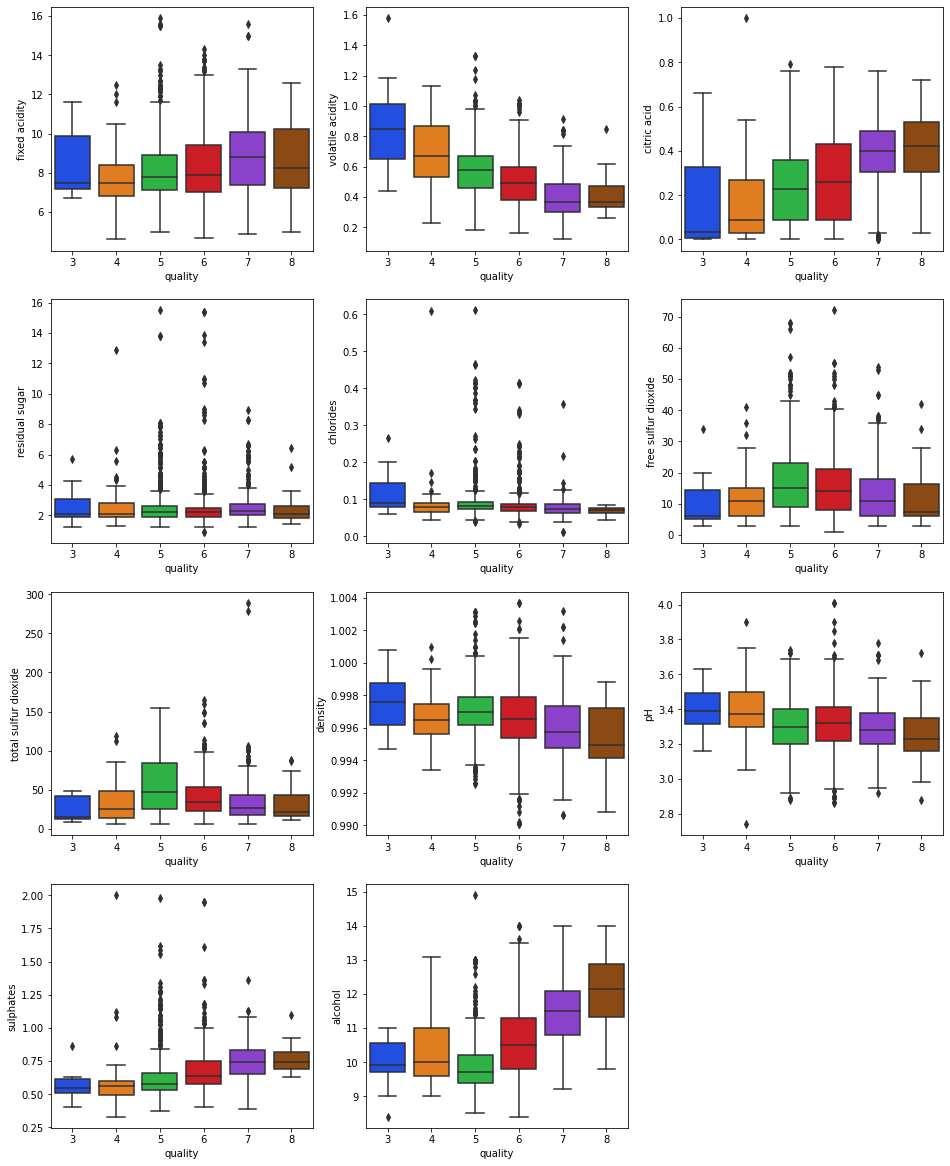

In [ ]:
features_ = wine_df.columns.values[:-1]

fig=plt.figure(figsize=(16, 26))
for column, feature in enumerate(features_):
    if feature != "quality":
        fig.add_subplot(5, 3, column + 1)
        sns.boxplot(data=wine_df, x="quality", y=feature, color="#8585f2", palette="bright")
    
plt.show()

No major pattern observed in [bivariate analysis](https://en.wikipedia.org/wiki/Bivariate_analysis#:~:text=Bivariate%20analysis%20is%20one%20of,testing%20simple%20hypotheses%20of%20association.)  
- The distribution of 'sulphates', 'alcohol' and 'citric acid' tend to increase with increasing wine quality. So, we can say that they are positively related.
- The distribution of 'volatile acidity', 'density' and 'ph' tend to decrease with increasing wine quality. So, we can say that they are negatively related.

### Key take-aways from EDA :  

- Based on the univariate analysis of feature, it was observed that a few Features are highly skewed which implies that extreme outliers are present.
- Based on the Bi-variate analysis, it was observed that a Few features were positively or negatively correlated with the target variable. 
- The target variable 'quality' is highly imbalanced which can affect machine learning model's performance.

## 4. Feature Engineering

#### Calculate Feature Importance (using [RandomForest's Feature Importance attribute](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e))

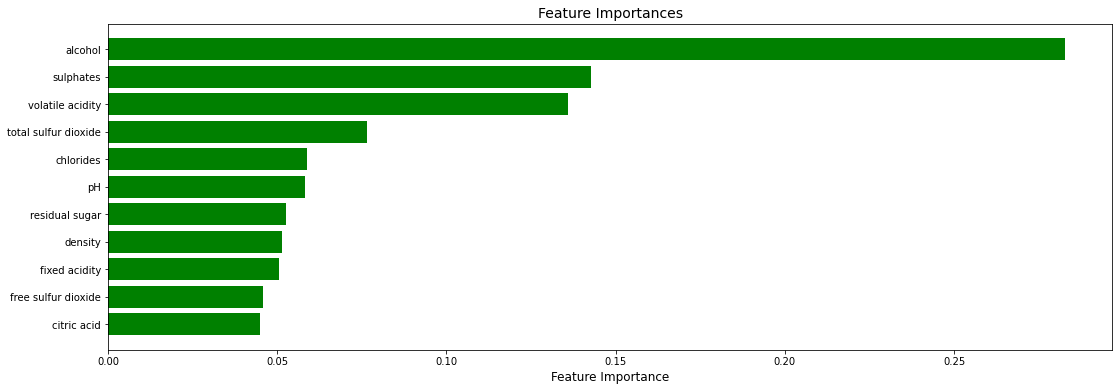

In [ ]:
# Let's use Random Forest Model to calculate Importance of Each Feature

# Import and initialize randomforest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, max_depth=12)

# prepare training data for this model
x = wine_df.drop(['quality'] , axis = 1)

# Train Model
rf.fit(x, wine_df.quality)

# store importance and feature names
features = wine_df.columns    # store feature names
importances = rf.feature_importances_    # get feature importance score from randomforest model using .feature_importance_ attribute
sorted_index = np.argsort(importances)[:]    # sort importance in descending order

# Plot Feature Importance
plt.figure(figsize=(18,6))
plt.title('Feature Importances', fontsize= 14)
plt.barh(range(len(sorted_index)), importances[sorted_index], color='green', align='center')
plt.yticks(range(len(sorted_index)), [features[i] for i in sorted_index]) # set x-axis ticks as feature names
plt.xlabel('Feature Importance', fontsize= 12)
plt.show()


- Alcohol content greatly affects the wine quality. Sulphates, volatile acidity and sulphur dioxide are also important for wine quality prediction.  
- As the importance of citric acid and free sulphur dioxide is very low, we can avoid them in model building.

#### Drop 'free sulfur dioxide','citric acid' because of thier lower importance

In [ ]:
wine_df.drop(['free sulfur dioxide','citric acid'],axis=1,inplace=True)

### Split Features and Target

In [ ]:
# Input Features
X = wine_df.drop('quality', axis = 1)

# Target Variable
y = wine_df['quality']

#### Split Training and Testing Data using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y, random_state=42)

Keep stratify = y, because we want [stratified](https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter) training and testing data. It means that all 6 categories of target variable will be present in equal ratio in both training and testing data.

#### Standardize input columns suing [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# standardize all columns of training and testing data
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

#### Check for multi-collinearity

In [ ]:
# Save the training data in a separate df which will be used for finding coorelation
df_corr = X_train.copy()

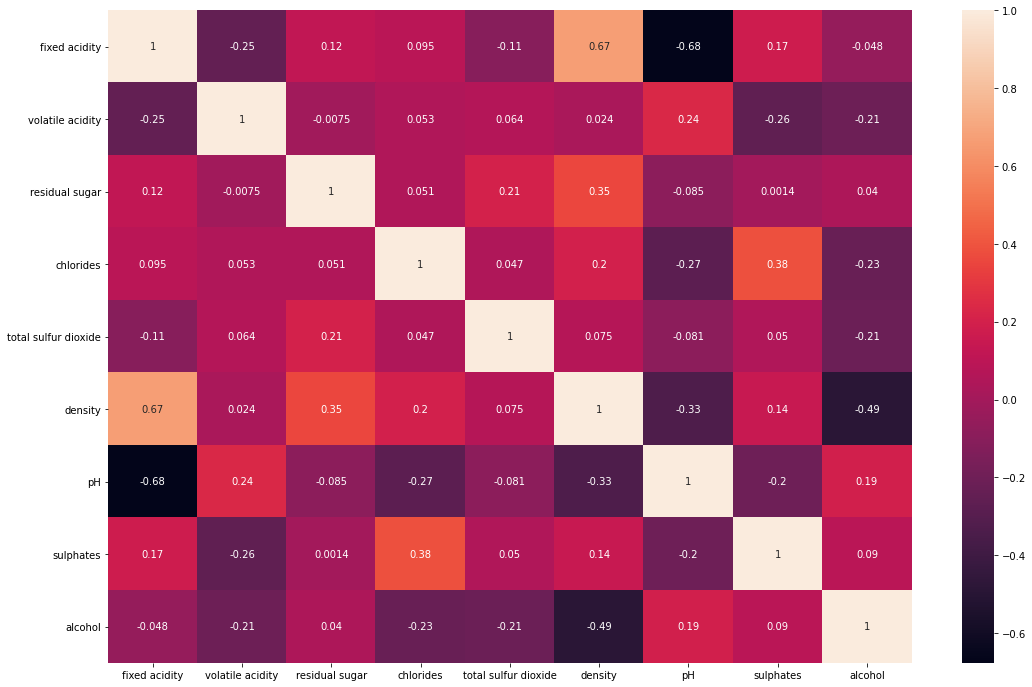

In [ ]:
# plot a heatmap of correlation in training data
plt.figure(figsize = (18,12))

# seaborn heatmap
sns.heatmap(df_corr.corr(),cbar=True, annot=True) # annot=True shows value in each file of heatmap, cbar shows the colour scale
plt.show()

A slight multi collinearity is observed in a few features. But, the level of collinearity is not very high. So we will not drop any feature.

#### Lets have a look at the training data again

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
1070,0.568736,-1.103037,-0.736729,-0.636853,-0.302258,-0.940708,-0.845406,1.314752,0.627630
563,-0.420879,-1.327359,0.100482,0.080037,0.391344,0.185132,0.005595,-0.298047,-0.308238
523,0.568736,-0.710475,-0.039053,-0.063341,2.864186,0.556871,-0.583560,-0.643646,-0.963346
1227,0.394099,0.298972,-0.387891,0.325828,-0.784763,0.498455,-0.256251,0.335553,-0.776172
1399,-0.653729,0.803695,-0.248356,-0.411544,-0.694293,-0.611453,0.725674,0.335553,0.627630


Everything look fine! Lets go ahead with Model Building.

## Lets Over-Sample the training Data  

As, there are 6 categories in the target variable and out of it 2 variables have more than 80% of records.  

Imbalanced dataset pose a challenge for predictive modeling as most of the machine learning algorithms used for classification are designed around the assumption of an equal number of examples for each class. So, training a model on imbalanced dataset results in poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

For this purpose We will over-sample the minority class (1's) in the target variable and make the number of 0's(majority class) and 1's(minority class) equal.

![1_o_KfyMzF7LITK2DlYm_wHw.png](attachment:1_o_KfyMzF7LITK2DlYm_wHw.png)

We will be using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) for over-sampling purpose. It works by selecting minority samples that are close in the feature space, drawing a line between these samples in the feature space and drawing a new sample at a point along that line.

Specifically, a random sample from the minority class is first chosen. Then k of the nearest neighbors for that sample are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

![Synthetic-minority-over-sampling-technique-SMOTE.png](attachment:Synthetic-minority-over-sampling-technique-SMOTE.png)

### Perform training data over-sampling

In [ ]:
# Import Synthetic minority over-sampling from imblearn libraray
from imblearn.over_sampling import SMOTE

In [ ]:
smte = SMOTE(random_state=42)
X_train_os, y_train_os = smte.fit_resample(X_train,y_train)  # Fit SMOTE with training data and re-sample the data to get balanced data.

print('Training data classes :5\'s   6\'s   7\'s   4\'s  8\'s 3\'s')
print('Before over-sampling   {}   {}   {}   {}   {}   {}'.format(list(y_train.value_counts().values)[0],list(y_train.value_counts().values)[1],list(y_train.value_counts().values)[2],list(y_train.value_counts().values)[3],list(y_train.value_counts().values)[4],list(y_train.value_counts().values)[5]))
print('After over-sampling    {}   {}   {}   {}  {}  {}\n'.format(list(y_train_os.value_counts().values)[0],list(y_train_os.value_counts().values)[1],list(y_train_os.value_counts().values)[2],list(y_train_os.value_counts().values)[3],list(y_train_os.value_counts().values)[4],list(y_train_os.value_counts().values)[5]))

print('After Over-sampling {} synthetic records were added to the training data and now there are equal proportion of records from each class'.format(len(X_train_os)-len(X_train)))

SyntaxError: ignored

Since we are using categorical cross-entropy for traing ANN model later in this project, we need to convert y_train_os and y_test into multi dimensional format.(kind of 1-hot encoding)  
For this purpose first we encode both target variable, convert it into dataframe and then use [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)to convert into binary class matrix.

In [ ]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_os = le.fit_transform(y_train_os)
y_test = le.transform(y_test)

In [ ]:
y_train_os = pd.DataFrame(y_train_os.reshape(len(y_train_os),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

Convert y_train_os and y_test into binary matrix representation.

In [ ]:
import tensorflow as tf                     # use to_categorical function present in tensorflow library
y_train_os = tf.keras.utils.to_categorical(y_train_os, 6)
y_test = tf.keras.utils.to_categorical(y_test, 6)

## 5. Model Building  
We will be using  [Artificial Neural Network (ANN)](https://en.wikipedia.org/wiki/Artificial_neural_network) Model for this project.  

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute Human brains.  
ANN consists of multiple nodes, which imitate biological neurons of human brain. The neurons are connected by links and they interact with each other. The nodes can take input data and perform operations on the data. The result of these operations is passed to other neurons. The output at each node is called node value.

Artificial Neural Networks are made up of 3 types of layers:
- Input layer — initial data for the neural network.
- Hidden layers — intermediate layer between input and output layer and place where all the computation is done.
- Output layer — produce the result for given inputs.

Some Important points about ANN :
 - It is mostly used in supervised learning for instances such as classification, image recognition etc
 - it can be used for both classification and regression problems.
 - It can also handle non-linear data which was not possible in case of linear models.
 
Advantages :  
 - ANN learning methods are quite robust to noise in the training data.
 - It has fault tolerance.
 
Disadvantages :  
 - Unexplained functioning of the network
 - Hardware dependence:  Artificial neural networks require processors with parallel processing power, by their structure.

#### Let's see how an ANN model Works  
For Neural Netrowk model building we will be using [TensorFlow](https://www.tensorflow.org/) Library. TensorFlow is an open-source library developed by Google primarily for deep learning applications. It also supports traditional machine learning. TensorFlow was originally developed for large numerical computations without keeping deep learning in mind. However, it proved to be very useful for deep learning development as well.

In [ ]:
# Import Necessary Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.layers import Dropout

- A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
- A densely-connected neural network layer. Dense implements the operation activation(matmul(input, weight) + bias) , where weight is a weight matrix, bias is a bias vector, and activation is an element-wise activation function.
- The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

<b> Creating dataset for an AND Gate</b>

In [ ]:
# Inputs (These inputs resemble an AND gate)
x1 = np.array([[0,0], [0,1], [1,0], [1,1]], "uint8")

# Target
y1  = np.array([[0], [0], [0], [1]], "uint8")

#### Using Tensorflow Create a Sequential Model   
Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it. We use the 'add()' function to add layers to our model.

In [ ]:
# Define sequential model
model = Sequential()

# Add output layer, here we just need to add 1 output layer, with 2 dimensional input and sigmoid activation function
model.add(Dense(units=1, activation='sigmoid',input_dim=2))

# Compile model and define the loss function, optimizers, and metrics for prediction
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
model.summary()

Here is how the Neural Network looks:

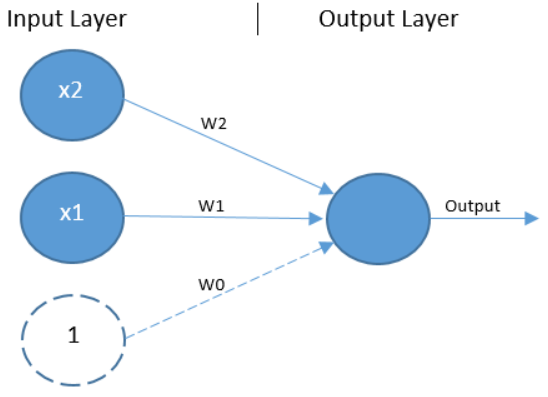

Here we are using 2 inputs x1, x2 (2 inputs of AND gate) and we have 1 output layer with only 1 neuron(output of AND gate) since we will be getting a single value as output.

<b>Train the Model</b>

In [ ]:
model.fit(x1, y1, epochs=5000)

<b>Let's check the Model weights and Bias after Training</b>  
Within each node is a set of inputs, weight, and a bias value. **Weight** is the parameter within a neural network that transforms input data within the network's hidden layers. Whereas, **Bias** is added to increase the flexibility of the model to fit the data. Specifically, it allows the network to fit the data when all input features are equal to 0, and very likely decreases the bias of the fitted values elsewhere in the data space.

In [ ]:
print('Weights :',model.layers[0].get_weights()[0])
print('Bias    :',model.layers[0].get_weights()[1])

<b>Model Prediction</b>  
Lets use the trained model to make prediction

In [ ]:
# For 0 Condition of AND gate (0,0)
print('For 0 Condition, Model prediction :',model.predict(np.array([[0,0]], "uint8"))) # give the test data in an array format

# For 1 Condition of AND gate (1,1)
print('For 1 Condition, Model prediction :',model.predict(np.array([[1,1]], "uint8")))

We can see that the model has learned to predict 0 and 1. It means it has learned the patterns present in the training data well.  
You can also compare these value with a threshold value (for example, threshold = 0.5) and classify the output as 0 or 1 for better clarity of model predictions.

#### Define the ANN Model for the wine_df data

In [ ]:
# Initialize a sequential model
model2=Sequential()

# add input layer with 9 neurons because we have 9 input features
model2.add(tf.keras.layers.Input(shape = 9,))

# add first hidden layer
model2.add(tf.keras.layers.Dense(32,activation='relu'))

model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

# add output layer with 6 neurons as there are 6 categories in the output feature
model2.add(tf.keras.layers.Dense(6,activation='softmax'))

#### Let's check how out model looks

In [ ]:
model2.summary()

#### Compile the prepared model  

Compile defines the loss function, the optimizer and the performance metrics.

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])

#### Train the ANN Model

In [ ]:
model2.fit(X_train_os,y_train_os,batch_size=50,epochs=400, verbose=1)

Model Training Finished!

## 6. Model Evaluation

#### Make predictions for the testing data using the trained model

In [ ]:
y_pred = model2.predict_classes(X_test)

#### Convert y_test to 1 dimension  
since we converted y_train and y_test to binary matrix earlier, The y_pred also in binary matrix form. so , use [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to convert binary matrix format back to 1-dimensional array.

In [ ]:
y_test = np.argmax(y_test,axis=1)

#### Find Model [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) for test data  
Accuracy is the proportion of correct model prediction.

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calculate and print accuracy score
print('Model Accuracy :',(accuracy_score(y_test,y_pred)*100),'%')

#### Lets check the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to study the model performance for each class

In [ ]:
# Import classification_report
from sklearn.metrics import classification_report

# using testing data and prediction's get the classification repoort
print(classification_report(y_test, y_pred))

### Key points  
- So for a sample of 100 red wines, model wil correctly predict the wine quality for 69 wines.
- there were 6 classes in the target variable, out of which 3 classes had a very few records (support signifies the number of records in testing data corresponding to each class).
- The performance of model for classes 2,3,4 which had good number of records(support) in the testing data was good (>=65%) in terms of precision, recall and accuracy.
- Even after over-sampling model performance for classes 0,1 was not good.
- For  class 5, even though it was minority class, model performance was decent.